In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv("uber.csv")

In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

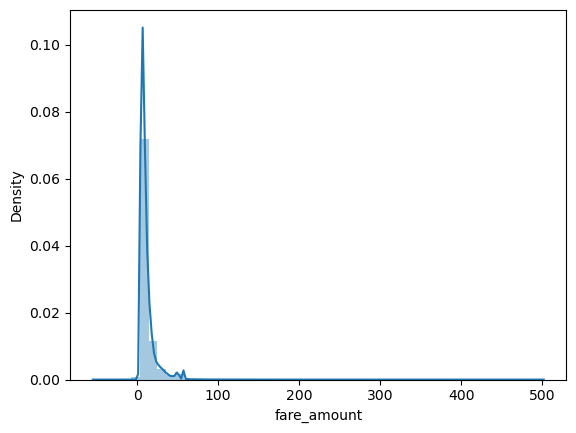

In [7]:
sns.distplot(df["fare_amount"])

In [8]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("key", axis=1, inplace=True)

In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
#creating function for the outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers=df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    return outliers

In [11]:
outliers=find_outliers_IQR(df["fare_amount"])
print("length of outlier is"+str(len(outliers)))

length of outlier is17166


In [12]:
print("outlier is"+ str(outliers))

outlier is6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64


In [13]:
print("outlier is"+ str(outliers.min()))

outlier is-52.0


In [14]:
print("outlier is"+ str(outliers.max()))

outlier is499.0


In [15]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [16]:
#time to apply lenar regression model
from sklearn.model_selection import train_test_split

In [17]:
x=df.drop("fare_amount",axis=1)
y=df['fare_amount']

In [18]:
x['pickup_datetime']=pd.to_numeric(x['pickup_datetime'])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)


LinearRegression()

In [85]:
pred=lrmodel.predict(x_test)

In [86]:
from sklearn.metrics import mean_squared_error
lrmselr=np.sqrt(mean_squared_error(pred,y_test))
print("rmse value for model is",lrmselr)

rmse value for model is 9.84076882870793


In [87]:
#lets apply random forest regressor
from sklearn.ensemble import RandomForestRegressor
rsmodel=RandomForestRegressor(n_estimators=100, random_state=101)
rsmodel.fit(x_train,y_train)

RandomForestRegressor(random_state=101)

In [88]:
#prediction
pred2=rsmodel.predict(x_test)

In [89]:
lrmserf=np.sqrt(mean_squared_error(pred2,y_test))
print("rmse value for model is",lrmserf)

rmse value for model is 4.470546456927399
